In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

In [2]:
import csv #Import csv
from datetime import datetime
import jsonpickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import sys
import tweepy

In [3]:
#Google Trend API Wrapper
from pytrends.request import TrendReq
pytrends = TrendReq()

In [4]:
def GoogleTrendsNSDxMT(kw_list):
    """ Args:
        kw_list ([str]): keywords used in Google Trends, 'National Sandwich Day, Me Too'   
        
    Returns:
        GoogleTrendsNSDxMT_chart: line graph depicting search of keywords over time
        
    Raises:
        ValueError: Opps, something went wrong. Please check your syntax and try again. """
    #search items
    kw_list = ["National Sandwich Day", "Me too"] 
    
    #load paramaters for data, not necessary for all GoogleTrends API uses
    pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US') 
    
    #actual pulling of data 
    GoogleTrendsNSDxMT_df=pytrends.interest_over_time()
    
    #parsing dataframe to the relevant columns
    GoogleTrendsNSDxMT_df=GoogleTrendsNSDxMT_df[['National Sandwich Day', 'Me too']]
    
    #plot chart
    GoogleTrendsNSDxMT_chart= GoogleTrendsNSDxMT_df.plot.line()

In [5]:
def GoogleTrendsiPXxWSG7(kw_list):
    """ Args:
        kw_list ([str]): keywords used in Google Trends, 'IPhone X, World Series Game 7'   
        
    Returns:
        GoogleTrendsiPXxWSG7_chart: line graph depicting search of keywords over time
        
    Raises:
        ValueError: Opps, something went wrong. Please check your syntax and try again. """
        
    
    #search items
    kw_list= [ "iPhone X","World Series Game 7"]
    
    #load parameters for data pull, not necessary for all Google Trends API uses
    pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US')
    
    #actual pulling of data
    GoogleTrendsiPXxWSG7_df=pytrends.interest_over_time()
    
    #parsing dataframe down to relevant columns
    GoogleTrendsiPXxWSG7_df=GoogleTrendsiPXxWSG7_df[['iPhone X', 'World Series Game 7']]
    
    #plot chart
    GoogleTrendsiPXxWSG7_chart= GoogleTrendsiPXxWSG7_df.plot.line()

In this chart, we have one hashtag that was trending throughout the week and another that spiked on a specific day due to the events on that day. The “iPhoneX” hashtag was trending more throughout the week than the “World Series Game Seven” hashtag, but the World Series hashtag spiked on the 2nd , after the game aired on the 1st of November. Even though the iPhoneX was released over the weekend, there was still a pretty consistent buzz throughout the course of the week compared to the World Series hashtag which had close to zero tweets before the game occurred.

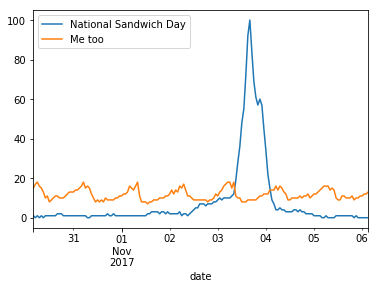

In [6]:
GoogleTrendsNSDxMT(['National Sandwich Day','Me too'])

Another example comparing a hashtag trending throughout the week with one that spiked on a specific day. The National Sandwich Day hashtag spiked on the 4th and had few tweets leading up to the “holiday”. The “Me Too” hashtag was consistently trending throughout the week without a spike. This makes me wonder if there was a point in time where this hashtag did spike like the “National Sandwich Day” one or if it has always been consistently trending like this past week. However, this brings the limitations of the Twitter API itself into question. We would probably need to use a different data visualization technique for this purpose.

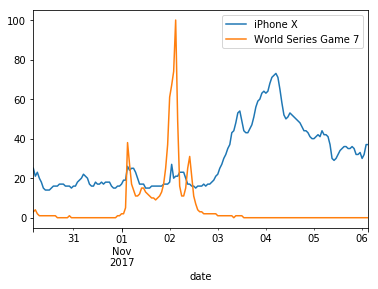

In [7]:
GoogleTrendsiPXxWSG7(['iPhone X','World Series Game 7'])

In [8]:

#Consumer Key 
API_KEY= 'QjyJ4Aa8xTm6Yyok0xHYC7q1b'
#Consumer Secret (Hey Don't Look!)
API_SECRET= 'QAKECWDILlUVQmwxmgzEfb50ajUdXuFhmkIbHbfhN6eXH9b9y2'


In [9]:
# Access Twitter, using AppAuth instead of OAuth to increase speed
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True,
                   wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)


In [10]:
def hashtag_tweets(hashtag):
    """ Args:
        hashtag (str): hashtag whose tweets you want to grab   
        
    Returns:
        hashtag_tweets_chart: line graph depicting use of hashtag on a per hour basis over the course of a week
        hashtag_tweets.csv: csv file containing the timestamp of every tweet using the hashtag over 7 days and a count of total tweets for the hashtag
        
    Raises:
        TweepError: "some error : " + str(TweepError) """
   
    searchQuery = hashtag  # this is what we're searching for
    maxTweets = 10000000 # Some arbitrary large number
    tweetsPerQry = 100  # this is the max the API permits
    fname = 'hashtag_tweets.csv' #file to save tweet info

    csvFile = open('hashtag_tweets.csv', 'a') #open file where tweet info will be stored 
    csvwriter= csv.writer(csvFile, delimiter=' ') #automatically reads tweet data and parses
    csvwriter.writerow(['DateTime']) #only show the Timestamp for the tweets

    # If results from a specific ID onwards are reqd, set since_id to that ID.
    # else default to no lower limit, go as far back as API allows
    sinceId = None

    # If results only below a specific ID are, set max_id to that ID.
    # else default to no upper limit, start from the most recent tweet matching the search query.
    max_id = (-1)

    tweetCount = 0
    print("Downloading max {0} tweets".format(maxTweets)) #Graphical help to show progress
    with open(fname, 'w') as f:
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                for tweet in new_tweets:
                     csvwriter.writerow([tweet.created_at]) #recording the tweet info
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id
            except tweepy.TweepError as e:
                # Just exit if any error
                print("some error : " + str(e))
                break

    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fname))
    
    csvFile.close()
    
    hashtag_tweets_df= pd.read_csv('../FinalProject/hashtag_tweets.csv') #read tweet info
    hashtag_tweets_df.insert(1, 'Tweet Count', range(len(hashtag_tweets_df))) #insert column to count tweets
    hashtag_tweets_df['DateTime'] = pd.to_datetime(hashtag_tweets_df['DateTime']) #making sure it recognizes the entries as timestamps
   
    ts = hashtag_tweets_df.set_index('DateTime')
    hashtag_tweets_df= ts.resample('H').count() #shows the count of number of entries per hour, will help with graphical processing
    
    hashtag_tweets_chart=hashtag_tweets_df.plot.line(legend=False) #plot the chart

Downloaded 26 tweets
No more tweets found
Downloaded 26 tweets, Saved to hashtag_tweets.csv


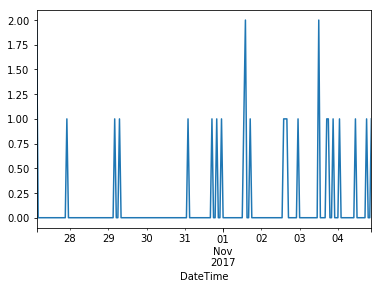

In [11]:
hashtag_tweets('#GoGreater') #small test hashtag

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1533 tweets
No more tweets found
Downloaded 1533 tweets, Saved to hashtag_tweets.csv


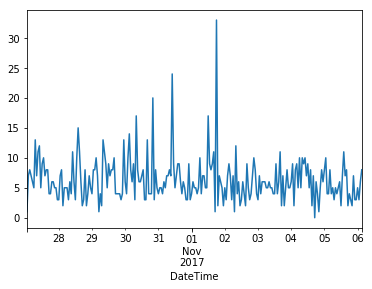

In [12]:
hashtag_tweets('#iPhone5s') #larger test hashtag

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

Downloaded 34600 tweets
Downloaded 34700 tweets
Downloaded 34800 tweets
Downloaded 34900 tweets
Downloaded 35000 tweets
Downloaded 35100 tweets
Downloaded 35200 tweets
Downloaded 35300 tweets
Downloaded 35400 tweets
Downloaded 35500 tweets
Downloaded 35600 tweets
Downloaded 35700 tweets
Downloaded 35800 tweets
Downloaded 35900 tweets
Downloaded 36000 tweets
Downloaded 36100 tweets
Downloaded 36200 tweets
Downloaded 36300 tweets
Downloaded 36400 tweets
Downloaded 36500 tweets
Downloaded 36600 tweets
Downloaded 36700 tweets
Downloaded 36800 tweets
Downloaded 36900 tweets
Downloaded 37000 tweets
Downloaded 37100 tweets
Downloaded 37200 tweets
Downloaded 37300 tweets
Downloaded 37400 tweets
Downloaded 37500 tweets
Downloaded 37600 tweets
Downloaded 37700 tweets
Downloaded 37800 tweets
Downloaded 37900 tweets
Downloaded 38000 tweets
Downloaded 38100 tweets
Downloaded 38200 tweets
Downloaded 38300 tweets
Downloaded 38400 tweets
Downloaded 38500 tweets
Downloaded 38600 tweets
Downloaded 38700

Downloaded 68599 tweets
Downloaded 68699 tweets
Downloaded 68799 tweets
Downloaded 68899 tweets
Downloaded 68999 tweets
Downloaded 69099 tweets
Downloaded 69199 tweets
Downloaded 69299 tweets
Downloaded 69399 tweets
Downloaded 69499 tweets
Downloaded 69599 tweets
Downloaded 69699 tweets
Downloaded 69799 tweets
Downloaded 69899 tweets
Downloaded 69999 tweets
Downloaded 70099 tweets
Downloaded 70199 tweets
Downloaded 70299 tweets
Downloaded 70399 tweets
Downloaded 70499 tweets
Downloaded 70599 tweets
Downloaded 70697 tweets
No more tweets found
Downloaded 70697 tweets, Saved to hashtag_tweets.csv


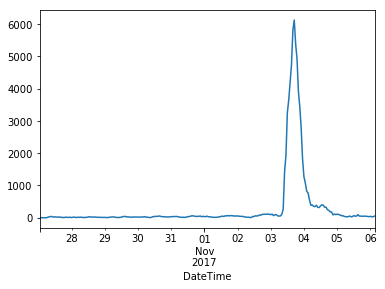

In [13]:
hashtag_tweets('#nationalsandwichday')

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

Downloaded 34398 tweets
Downloaded 34498 tweets
Downloaded 34598 tweets
Downloaded 34698 tweets
Downloaded 34798 tweets
Downloaded 34898 tweets
Downloaded 34998 tweets
Downloaded 35098 tweets
Downloaded 35198 tweets
Downloaded 35298 tweets
Downloaded 35398 tweets
Downloaded 35498 tweets
Downloaded 35598 tweets
Downloaded 35698 tweets
Downloaded 35798 tweets
Downloaded 35898 tweets
Downloaded 35998 tweets
Downloaded 36097 tweets
Downloaded 36197 tweets
Downloaded 36297 tweets
Downloaded 36397 tweets
Downloaded 36497 tweets
Downloaded 36597 tweets
Downloaded 36697 tweets
Downloaded 36797 tweets
Downloaded 36897 tweets
Downloaded 36997 tweets
Downloaded 37097 tweets
Downloaded 37197 tweets
Downloaded 37297 tweets
Downloaded 37397 tweets
Downloaded 37497 tweets
Downloaded 37597 tweets
Downloaded 37697 tweets
Downloaded 37797 tweets
Downloaded 37897 tweets
Downloaded 37997 tweets
Downloaded 38097 tweets
Downloaded 38197 tweets
Downloaded 38297 tweets
Downloaded 38397 tweets
Downloaded 38497

Downloaded 68396 tweets
Downloaded 68496 tweets
Downloaded 68596 tweets
Downloaded 68696 tweets
Downloaded 68796 tweets
Downloaded 68896 tweets
Downloaded 68996 tweets
Downloaded 69096 tweets
Downloaded 69196 tweets
Downloaded 69296 tweets
Downloaded 69396 tweets
Downloaded 69496 tweets
Downloaded 69596 tweets
Downloaded 69696 tweets
Downloaded 69796 tweets
Downloaded 69896 tweets
Downloaded 69996 tweets
Downloaded 70096 tweets
Downloaded 70196 tweets
Downloaded 70296 tweets
Downloaded 70396 tweets
Downloaded 70496 tweets
Downloaded 70596 tweets
Downloaded 70696 tweets
Downloaded 70796 tweets
Downloaded 70896 tweets
Downloaded 70996 tweets
Downloaded 71096 tweets
Downloaded 71196 tweets
Downloaded 71296 tweets
Downloaded 71396 tweets
Downloaded 71496 tweets
Downloaded 71596 tweets
Downloaded 71696 tweets
Downloaded 71796 tweets
Downloaded 71896 tweets
Downloaded 71996 tweets
Downloaded 72096 tweets
Downloaded 72196 tweets
Downloaded 72296 tweets
Downloaded 72396 tweets
Downloaded 72496

Downloaded 102496 tweets
Downloaded 102596 tweets
Downloaded 102696 tweets
Downloaded 102796 tweets
Downloaded 102896 tweets
Downloaded 102996 tweets
Downloaded 103096 tweets
Downloaded 103196 tweets
Downloaded 103296 tweets
Downloaded 103396 tweets
Downloaded 103496 tweets
Downloaded 103596 tweets
Downloaded 103696 tweets
Downloaded 103796 tweets
Downloaded 103896 tweets
Downloaded 103996 tweets
Downloaded 104096 tweets
Downloaded 104196 tweets
Downloaded 104296 tweets
Downloaded 104396 tweets
Downloaded 104496 tweets
Downloaded 104596 tweets
Downloaded 104696 tweets
Downloaded 104796 tweets
Downloaded 104896 tweets
Downloaded 104996 tweets
Downloaded 105096 tweets
Downloaded 105196 tweets
Downloaded 105296 tweets
Downloaded 105396 tweets
Downloaded 105496 tweets
Downloaded 105596 tweets
Downloaded 105696 tweets
Downloaded 105796 tweets
Downloaded 105896 tweets
Downloaded 105996 tweets
Downloaded 106096 tweets
Downloaded 106196 tweets
Downloaded 106296 tweets
Downloaded 106396 tweets


Downloaded 135196 tweets
Downloaded 135296 tweets
Downloaded 135396 tweets
Downloaded 135496 tweets
Downloaded 135596 tweets
Downloaded 135696 tweets
Downloaded 135796 tweets
Downloaded 135896 tweets
Downloaded 135996 tweets
Downloaded 136096 tweets
Downloaded 136196 tweets
Downloaded 136296 tweets
Downloaded 136396 tweets
Downloaded 136496 tweets
Downloaded 136596 tweets
Downloaded 136696 tweets
Downloaded 136796 tweets
Downloaded 136896 tweets
Downloaded 136996 tweets
Downloaded 137096 tweets
Downloaded 137196 tweets
Downloaded 137296 tweets
Downloaded 137396 tweets
Downloaded 137496 tweets
Downloaded 137596 tweets
Downloaded 137696 tweets
Downloaded 137796 tweets
Downloaded 137896 tweets
Downloaded 137996 tweets
Downloaded 138096 tweets
Downloaded 138196 tweets
Downloaded 138296 tweets
Downloaded 138396 tweets
Downloaded 138496 tweets
Downloaded 138596 tweets
Downloaded 138696 tweets
Downloaded 138796 tweets
Downloaded 138896 tweets
Downloaded 138996 tweets
Downloaded 139096 tweets


Downloaded 167896 tweets
Downloaded 167996 tweets
Downloaded 168096 tweets
Downloaded 168196 tweets
Downloaded 168296 tweets
Downloaded 168396 tweets
Downloaded 168496 tweets
Downloaded 168596 tweets
Downloaded 168696 tweets
Downloaded 168796 tweets
Downloaded 168896 tweets
Downloaded 168996 tweets
Downloaded 169096 tweets
Downloaded 169196 tweets
Downloaded 169296 tweets
Downloaded 169396 tweets
Downloaded 169496 tweets
Downloaded 169596 tweets
Downloaded 169696 tweets
Downloaded 169796 tweets
Downloaded 169896 tweets
Downloaded 169996 tweets
Downloaded 170096 tweets
Downloaded 170196 tweets
Downloaded 170296 tweets
Downloaded 170396 tweets
Downloaded 170496 tweets
Downloaded 170596 tweets
Downloaded 170696 tweets
Downloaded 170796 tweets
Downloaded 170896 tweets
Downloaded 170996 tweets
Downloaded 171096 tweets
Downloaded 171196 tweets
Downloaded 171296 tweets
Downloaded 171396 tweets
Downloaded 171496 tweets
Downloaded 171596 tweets
Downloaded 171696 tweets
Downloaded 171796 tweets


Downloaded 200595 tweets
Downloaded 200695 tweets
Downloaded 200795 tweets
Downloaded 200895 tweets
Downloaded 200995 tweets
Downloaded 201095 tweets
Downloaded 201195 tweets
Downloaded 201295 tweets
Downloaded 201395 tweets
Downloaded 201495 tweets
Downloaded 201595 tweets
Downloaded 201695 tweets
Downloaded 201795 tweets
Downloaded 201895 tweets
Downloaded 201995 tweets
Downloaded 202095 tweets
Downloaded 202195 tweets
Downloaded 202295 tweets
Downloaded 202395 tweets
Downloaded 202495 tweets
Downloaded 202595 tweets
Downloaded 202695 tweets
Downloaded 202795 tweets
Downloaded 202895 tweets
Downloaded 202995 tweets
Downloaded 203095 tweets
Downloaded 203195 tweets
Downloaded 203295 tweets
Downloaded 203395 tweets
Downloaded 203495 tweets
Downloaded 203595 tweets
Downloaded 203695 tweets
Downloaded 203795 tweets
Downloaded 203895 tweets
Downloaded 203995 tweets
Downloaded 204095 tweets
Downloaded 204195 tweets
Downloaded 204295 tweets
Downloaded 204395 tweets
Downloaded 204494 tweets


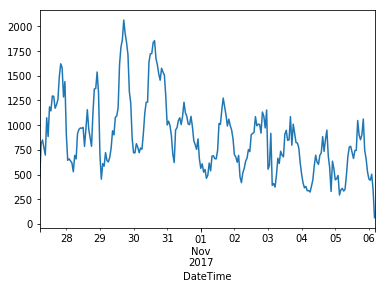

In [14]:
hashtag_tweets('#metoo')

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

Downloaded 34400 tweets
Downloaded 34500 tweets
Downloaded 34600 tweets
Downloaded 34700 tweets
Downloaded 34800 tweets
Downloaded 34900 tweets
Downloaded 35000 tweets
Downloaded 35100 tweets
Downloaded 35200 tweets
Downloaded 35300 tweets
Downloaded 35400 tweets
Downloaded 35500 tweets
Downloaded 35600 tweets
Downloaded 35700 tweets
Downloaded 35800 tweets
Downloaded 35900 tweets
Downloaded 36000 tweets
Downloaded 36100 tweets
Downloaded 36200 tweets
Downloaded 36300 tweets
Downloaded 36400 tweets
Downloaded 36500 tweets
Downloaded 36600 tweets
Downloaded 36700 tweets
Downloaded 36800 tweets
Downloaded 36900 tweets
Downloaded 37000 tweets
Downloaded 37100 tweets
Downloaded 37200 tweets
Downloaded 37300 tweets
Downloaded 37400 tweets
Downloaded 37500 tweets
Downloaded 37600 tweets
Downloaded 37700 tweets
Downloaded 37800 tweets
Downloaded 37900 tweets
Downloaded 38000 tweets
Downloaded 38100 tweets
Downloaded 38200 tweets
Downloaded 38300 tweets
Downloaded 38400 tweets
Downloaded 38500

Downloaded 67943 tweets
Downloaded 68043 tweets
Downloaded 68143 tweets
Downloaded 68243 tweets
Downloaded 68343 tweets
Downloaded 68443 tweets
Downloaded 68543 tweets
Downloaded 68643 tweets
Downloaded 68743 tweets
Downloaded 68843 tweets
Downloaded 68943 tweets
Downloaded 69043 tweets
Downloaded 69143 tweets
Downloaded 69243 tweets
Downloaded 69343 tweets
Downloaded 69443 tweets
Downloaded 69543 tweets
Downloaded 69643 tweets
Downloaded 69743 tweets
Downloaded 69843 tweets
Downloaded 69943 tweets
Downloaded 70043 tweets
Downloaded 70143 tweets
Downloaded 70243 tweets
Downloaded 70343 tweets
Downloaded 70443 tweets
Downloaded 70543 tweets
Downloaded 70643 tweets
Downloaded 70743 tweets
Downloaded 70843 tweets
Downloaded 70943 tweets
Downloaded 71043 tweets
Downloaded 71143 tweets
Downloaded 71243 tweets
Downloaded 71343 tweets
Downloaded 71443 tweets
Downloaded 71543 tweets
Downloaded 71643 tweets
Downloaded 71743 tweets
Downloaded 71843 tweets
Downloaded 71943 tweets
Downloaded 72043

Downloaded 101943 tweets
Downloaded 102043 tweets
Downloaded 102143 tweets
Downloaded 102243 tweets
Downloaded 102343 tweets
Downloaded 102443 tweets
Downloaded 102543 tweets
Downloaded 102643 tweets
Downloaded 102743 tweets
Downloaded 102843 tweets
Downloaded 102943 tweets
Downloaded 103043 tweets
Downloaded 103143 tweets
Downloaded 103243 tweets
Downloaded 103343 tweets
Downloaded 103443 tweets
Downloaded 103543 tweets
Downloaded 103643 tweets
Downloaded 103743 tweets
Downloaded 103843 tweets
Downloaded 103943 tweets
Downloaded 104043 tweets
Downloaded 104143 tweets
Downloaded 104243 tweets
Downloaded 104343 tweets
Downloaded 104443 tweets
Downloaded 104543 tweets
Downloaded 104643 tweets
Downloaded 104743 tweets
Downloaded 104843 tweets
Downloaded 104943 tweets
Downloaded 105043 tweets
Downloaded 105143 tweets
Downloaded 105243 tweets
Downloaded 105343 tweets
Downloaded 105443 tweets
Downloaded 105543 tweets
Downloaded 105643 tweets
Downloaded 105743 tweets
Downloaded 105843 tweets


Downloaded 134643 tweets
Downloaded 134743 tweets
Downloaded 134843 tweets
Downloaded 134943 tweets
Downloaded 135043 tweets
Downloaded 135143 tweets
Downloaded 135243 tweets
Downloaded 135343 tweets
Downloaded 135443 tweets
Downloaded 135543 tweets
Downloaded 135643 tweets
Downloaded 135743 tweets
Downloaded 135843 tweets
Downloaded 135943 tweets
Downloaded 136043 tweets
Downloaded 136143 tweets
Downloaded 136243 tweets
Downloaded 136343 tweets
Downloaded 136443 tweets
Downloaded 136543 tweets
Downloaded 136643 tweets
Downloaded 136743 tweets
Downloaded 136843 tweets
Downloaded 136943 tweets
Downloaded 137043 tweets
Downloaded 137143 tweets
Downloaded 137243 tweets
Downloaded 137343 tweets
Downloaded 137443 tweets
Downloaded 137543 tweets
Downloaded 137643 tweets
Downloaded 137743 tweets
Downloaded 137843 tweets
Downloaded 137943 tweets
Downloaded 138043 tweets
Downloaded 138143 tweets
Downloaded 138243 tweets
Downloaded 138343 tweets
Downloaded 138443 tweets
Downloaded 138543 tweets


Downloaded 167343 tweets
Downloaded 167443 tweets
Downloaded 167543 tweets
Downloaded 167643 tweets
Downloaded 167743 tweets
Downloaded 167843 tweets
Downloaded 167943 tweets
Downloaded 168043 tweets
Downloaded 168143 tweets
Downloaded 168243 tweets
Downloaded 168343 tweets
Downloaded 168443 tweets
Downloaded 168543 tweets
Downloaded 168643 tweets
Downloaded 168743 tweets
Downloaded 168843 tweets
Downloaded 168943 tweets
Downloaded 169043 tweets
Downloaded 169143 tweets
Downloaded 169243 tweets
Downloaded 169343 tweets
Downloaded 169443 tweets
Downloaded 169543 tweets
Downloaded 169643 tweets
Downloaded 169743 tweets
Downloaded 169843 tweets
Downloaded 169943 tweets
Downloaded 170043 tweets
Downloaded 170143 tweets
Downloaded 170243 tweets
Downloaded 170343 tweets
Downloaded 170443 tweets
Downloaded 170543 tweets
Downloaded 170643 tweets
Downloaded 170743 tweets
Downloaded 170843 tweets
Downloaded 170943 tweets
Downloaded 171043 tweets
Downloaded 171143 tweets
Downloaded 171243 tweets


Downloaded 200141 tweets
Downloaded 200241 tweets
Downloaded 200341 tweets
Downloaded 200441 tweets
Downloaded 200541 tweets
Downloaded 200641 tweets
Downloaded 200741 tweets
Downloaded 200841 tweets
Downloaded 200941 tweets
Downloaded 201041 tweets
Downloaded 201141 tweets
Downloaded 201241 tweets
Downloaded 201341 tweets
Downloaded 201441 tweets
Downloaded 201541 tweets
Downloaded 201641 tweets
Downloaded 201741 tweets
Downloaded 201841 tweets
Downloaded 201941 tweets
Downloaded 202041 tweets
Downloaded 202141 tweets
Downloaded 202241 tweets
Downloaded 202341 tweets
Downloaded 202441 tweets
Downloaded 202541 tweets
Downloaded 202641 tweets
Downloaded 202741 tweets
Downloaded 202841 tweets
Downloaded 202941 tweets
Downloaded 203041 tweets
Downloaded 203141 tweets
Downloaded 203241 tweets
Downloaded 203341 tweets
Downloaded 203441 tweets
Downloaded 203541 tweets
Downloaded 203641 tweets
Downloaded 203741 tweets
Downloaded 203841 tweets
Downloaded 203941 tweets
Downloaded 204041 tweets


Downloaded 232841 tweets
Downloaded 232941 tweets
Downloaded 233041 tweets
Downloaded 233141 tweets
Downloaded 233241 tweets
Downloaded 233341 tweets
Downloaded 233441 tweets
Downloaded 233541 tweets
Downloaded 233641 tweets
Downloaded 233741 tweets
Downloaded 233841 tweets
Downloaded 233941 tweets
Downloaded 234041 tweets
Downloaded 234141 tweets
Downloaded 234241 tweets
Downloaded 234341 tweets
Downloaded 234441 tweets
Downloaded 234541 tweets
Downloaded 234641 tweets
Downloaded 234741 tweets
Downloaded 234841 tweets
Downloaded 234941 tweets
Downloaded 235041 tweets
Downloaded 235141 tweets
Downloaded 235241 tweets
Downloaded 235341 tweets
Downloaded 235441 tweets
Downloaded 235541 tweets
Downloaded 235641 tweets
Downloaded 235741 tweets
Downloaded 235841 tweets
Downloaded 235941 tweets
Downloaded 236041 tweets
Downloaded 236141 tweets
Downloaded 236241 tweets
Downloaded 236341 tweets
Downloaded 236441 tweets
Downloaded 236541 tweets
Downloaded 236641 tweets
Downloaded 236741 tweets


Downloaded 265541 tweets
Downloaded 265641 tweets
Downloaded 265741 tweets
Downloaded 265841 tweets
Downloaded 265941 tweets
Downloaded 266041 tweets
Downloaded 266141 tweets
Downloaded 266241 tweets
Downloaded 266341 tweets
Downloaded 266441 tweets
Downloaded 266541 tweets
Downloaded 266641 tweets
Downloaded 266741 tweets
Downloaded 266841 tweets
Downloaded 266941 tweets
Downloaded 267041 tweets
Downloaded 267141 tweets
Downloaded 267241 tweets
Downloaded 267341 tweets
Downloaded 267441 tweets
Downloaded 267541 tweets
Downloaded 267641 tweets
Downloaded 267741 tweets
Downloaded 267841 tweets
Downloaded 267941 tweets
Downloaded 268041 tweets
Downloaded 268141 tweets
Downloaded 268241 tweets
Downloaded 268341 tweets
Downloaded 268441 tweets
Downloaded 268541 tweets
Downloaded 268641 tweets
Downloaded 268741 tweets
Downloaded 268841 tweets
Downloaded 268941 tweets
Downloaded 269041 tweets
Downloaded 269141 tweets
Downloaded 269241 tweets
Downloaded 269341 tweets
Downloaded 269441 tweets


Downloaded 298341 tweets
Downloaded 298441 tweets
Downloaded 298541 tweets
Downloaded 298641 tweets
Downloaded 298741 tweets
Downloaded 298841 tweets
Downloaded 298941 tweets
Downloaded 299041 tweets
Downloaded 299141 tweets
Downloaded 299241 tweets
Downloaded 299341 tweets
Downloaded 299441 tweets
Downloaded 299541 tweets
Rate limit reached. Sleeping for: 472
Downloaded 299641 tweets
Downloaded 299741 tweets
Downloaded 299841 tweets
Downloaded 299941 tweets
Downloaded 300041 tweets
Downloaded 300141 tweets
Downloaded 300241 tweets
Downloaded 300341 tweets
Downloaded 300441 tweets
Downloaded 300541 tweets
Downloaded 300641 tweets
Downloaded 300741 tweets
Downloaded 300841 tweets
Downloaded 300941 tweets
Downloaded 301041 tweets
Downloaded 301141 tweets
Downloaded 301241 tweets
Downloaded 301341 tweets
Downloaded 301441 tweets
Downloaded 301541 tweets
Downloaded 301641 tweets
Downloaded 301741 tweets
Downloaded 301841 tweets
Downloaded 301941 tweets
Downloaded 302041 tweets
Downloaded 3

Downloaded 331041 tweets
Downloaded 331141 tweets
Downloaded 331241 tweets
Downloaded 331341 tweets
Downloaded 331441 tweets
Downloaded 331541 tweets
Downloaded 331641 tweets
Downloaded 331741 tweets
Downloaded 331841 tweets
Downloaded 331941 tweets
Downloaded 332041 tweets
Downloaded 332141 tweets
Downloaded 332241 tweets
Downloaded 332341 tweets
Downloaded 332441 tweets
Downloaded 332541 tweets
Downloaded 332641 tweets
Downloaded 332741 tweets
Downloaded 332841 tweets
Downloaded 332941 tweets
Downloaded 333041 tweets
Downloaded 333141 tweets
Downloaded 333241 tweets
Downloaded 333341 tweets
Downloaded 333441 tweets
Downloaded 333541 tweets
Downloaded 333641 tweets
Downloaded 333741 tweets
Downloaded 333841 tweets
Downloaded 333941 tweets
Downloaded 334041 tweets
Downloaded 334141 tweets
Downloaded 334241 tweets
Downloaded 334341 tweets
Downloaded 334441 tweets
Downloaded 334541 tweets
Downloaded 334641 tweets
Downloaded 334741 tweets
Downloaded 334841 tweets
Downloaded 334941 tweets


Downloaded 363741 tweets
Downloaded 363841 tweets
Downloaded 363941 tweets
Downloaded 364041 tweets
Downloaded 364141 tweets
Downloaded 364241 tweets
Downloaded 364341 tweets
Downloaded 364441 tweets
Downloaded 364541 tweets
Downloaded 364641 tweets
Downloaded 364741 tweets
Downloaded 364841 tweets
Downloaded 364941 tweets
Downloaded 365041 tweets
Downloaded 365141 tweets
Downloaded 365241 tweets
Downloaded 365341 tweets
Downloaded 365441 tweets
Downloaded 365541 tweets
Downloaded 365641 tweets
Downloaded 365741 tweets
Downloaded 365841 tweets
Downloaded 365941 tweets
Downloaded 366041 tweets
Downloaded 366141 tweets
Downloaded 366241 tweets
Downloaded 366341 tweets
Downloaded 366441 tweets
Downloaded 366541 tweets
Downloaded 366641 tweets
Downloaded 366741 tweets
Downloaded 366841 tweets
Downloaded 366941 tweets
Downloaded 367041 tweets
Downloaded 367141 tweets
Downloaded 367241 tweets
Downloaded 367341 tweets
Downloaded 367441 tweets
Downloaded 367541 tweets
Downloaded 367641 tweets


Downloaded 396439 tweets
Downloaded 396539 tweets
Downloaded 396639 tweets
Downloaded 396738 tweets
Downloaded 396838 tweets
Downloaded 396938 tweets
Downloaded 397038 tweets
Downloaded 397138 tweets
Downloaded 397238 tweets
Downloaded 397338 tweets
Downloaded 397438 tweets
Downloaded 397538 tweets
Downloaded 397638 tweets
Downloaded 397738 tweets
Downloaded 397838 tweets
Downloaded 397938 tweets
Downloaded 398038 tweets
Downloaded 398138 tweets
Downloaded 398238 tweets
Downloaded 398338 tweets
Downloaded 398438 tweets
Downloaded 398538 tweets
Downloaded 398638 tweets
Downloaded 398738 tweets
Downloaded 398838 tweets
Downloaded 398938 tweets
Downloaded 399038 tweets
Downloaded 399138 tweets
Downloaded 399238 tweets
Downloaded 399338 tweets
Downloaded 399438 tweets
Downloaded 399538 tweets
Downloaded 399638 tweets
Downloaded 399738 tweets
Downloaded 399838 tweets
Downloaded 399938 tweets
Downloaded 400038 tweets
Downloaded 400138 tweets
Downloaded 400238 tweets
Downloaded 400338 tweets


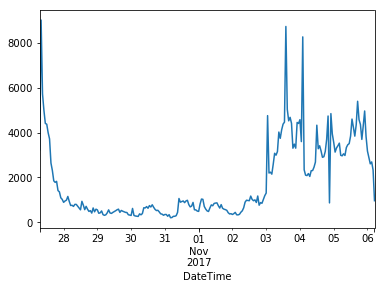

In [15]:
hashtag_tweets('#iphoneX')

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

Downloaded 34400 tweets
Downloaded 34500 tweets
Downloaded 34600 tweets
Downloaded 34700 tweets
Downloaded 34800 tweets
Downloaded 34900 tweets
Downloaded 35000 tweets
Downloaded 35100 tweets
Downloaded 35200 tweets
Downloaded 35300 tweets
Downloaded 35400 tweets
Downloaded 35500 tweets
Downloaded 35600 tweets
Downloaded 35700 tweets
Downloaded 35800 tweets
Downloaded 35900 tweets
Downloaded 36000 tweets
Downloaded 36100 tweets
Downloaded 36200 tweets
Downloaded 36300 tweets
Downloaded 36400 tweets
Downloaded 36500 tweets
Downloaded 36600 tweets
Downloaded 36700 tweets
Downloaded 36800 tweets
Downloaded 36900 tweets
Downloaded 37000 tweets
Downloaded 37100 tweets
Downloaded 37200 tweets
Downloaded 37300 tweets
Downloaded 37400 tweets
Downloaded 37500 tweets
Downloaded 37600 tweets
Downloaded 37700 tweets
Downloaded 37800 tweets
Downloaded 37900 tweets
Downloaded 38000 tweets
Downloaded 38100 tweets
Downloaded 38200 tweets
Downloaded 38300 tweets
Downloaded 38400 tweets
Downloaded 38500

Downloaded 68400 tweets
Downloaded 68500 tweets
Downloaded 68600 tweets
Downloaded 68700 tweets
Downloaded 68800 tweets
Downloaded 68900 tweets
Downloaded 69000 tweets
Downloaded 69100 tweets
Downloaded 69200 tweets
Downloaded 69300 tweets
Downloaded 69400 tweets
Downloaded 69500 tweets
Downloaded 69600 tweets
Downloaded 69700 tweets
Downloaded 69800 tweets
Downloaded 69900 tweets
Downloaded 70000 tweets
Downloaded 70100 tweets
Downloaded 70200 tweets
Downloaded 70300 tweets
Downloaded 70400 tweets
Downloaded 70500 tweets
Downloaded 70600 tweets
Downloaded 70700 tweets
Downloaded 70800 tweets
Downloaded 70900 tweets
Downloaded 71000 tweets
Downloaded 71100 tweets
Downloaded 71200 tweets
Downloaded 71300 tweets
Downloaded 71400 tweets
Downloaded 71500 tweets
Downloaded 71600 tweets
Downloaded 71700 tweets
Downloaded 71800 tweets
Downloaded 71900 tweets
Downloaded 72000 tweets
Downloaded 72100 tweets
Downloaded 72200 tweets
Downloaded 72300 tweets
Downloaded 72400 tweets
Downloaded 72500

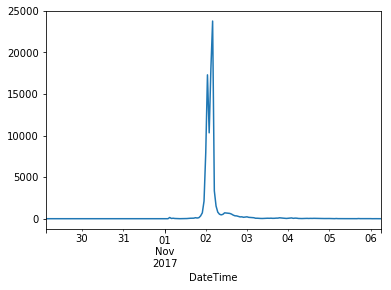

In [16]:
hashtag_tweets('#worldseriesgame7')